In [3]:
import seaborn as sns

df = sns.load_dataset('iris')

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


100
finished in 10 iterations
38
36
26
[[5.457500000000001, 5.1154210526315795], [4.674638888888889, 5.25536111111111], [4.908307692307693, 4.5963076923076915]]


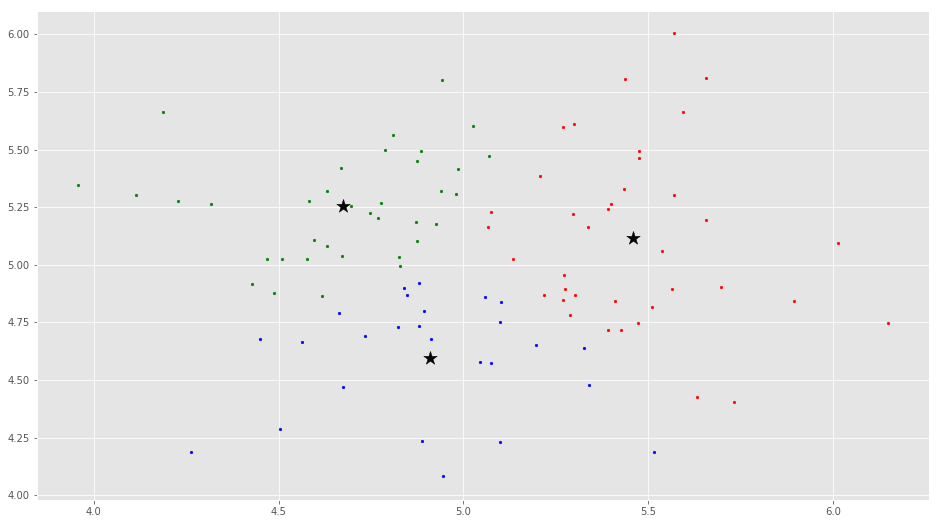

In [8]:
%matplotlib inline

from copy import deepcopy
from matplotlib import pyplot as plt
import random

# import seaborn as sns
# import pandas as pd
import numpy as np
from operator import itemgetter

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


def euclidian_distance(sample1, sample2):
    result = sum(map(lambda t: (t[0] - t[1]) ** 2,
                     zip(sample1, sample2)))
    # print(result)
    return result


# def predict(train_set, sample, k=3, distance=euclidian_distance):
#     k_nearest = sorted(train_set, key=lambda s: distance(s, sample))[:k]
#     return Counter(map(get_label, k_nearest)).most_common(1)[0][0]


def read_points(filename):
    with open(filename) as file:
        content = file.readlines()
    return [list(map(float, x.strip().split('\t', 2))) for x in content]


def mean(points):
    count = len(points)
    sum_x1 = sum([point[0] for point in points])
    sum_x2 = sum([point[1] for point in points])
    return [sum_x1 / count, sum_x2 / count]


def train(data_set, k, max_iterations=10, dist=euclidian_distance):
    # total distance between 2 vector of points
    def vector_dist(vector1, vector2):
        return sum(map(lambda t: dist(t[0], t[1]),
                       zip(vector1, vector2)))

    random.shuffle(data_set)
    clusters = [0 for _ in range(len(data_set))]
    centroids = data_set[:k]    # TODO: we chose points from the data set
    centroids_old = [[0, 0] for _ in range(k)]
    error = vector_dist(centroids, centroids_old)
    iterations = 0

    while error != 0 or iterations < max_iterations:
        # assign each sample to its closest cluster (nearest centroid)
        for sample_id in range(len(data_set)):
            nearest_centroid = min(centroids,
                                   key=lambda c: dist(data_set[sample_id], c))
            cluster_index = centroids.index(nearest_centroid)
            clusters[sample_id] = cluster_index

        centroids_old = deepcopy(centroids)

        # for each cluster assign a new centroid
        for cluster_id in range(k):
            points = [data_set[sample_id]
                      for sample_id in range(len(data_set))
                      if clusters[sample_id] == cluster_id]
            centroids[cluster_id] = mean(points)

        error = vector_dist(centroids, centroids_old)
        iterations += 1

    print("finished in %d iterations" % iterations)
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    for i in range(k):
            points = np.array([data_set[j]
                              for j in range(len(data_set))
                              if clusters[j] == i])
            print(len(points))
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    # ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
    ax.scatter(list(map(itemgetter(0), centroids)),
               list(map(itemgetter(1), centroids)),
               marker='*', s=200, c='#050505')

    return centroids


random_seed = 42
vectors = read_points('/home/tony/source/learning/algorithms/k-means/normal/normal.txt')
print(len(vectors))
random.seed(random_seed)

print(train(vectors, 3))
